In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("../24 - Classic Time Series/data/daily_min_temp.csv", index_col="Date", parse_dates=["Date"])
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


# Resampling Data 

<img src="https://cdn.discordapp.com/attachments/969207152679993414/1027922402954461295/unknown.png">

<AxesSubplot:xlabel='Date'>

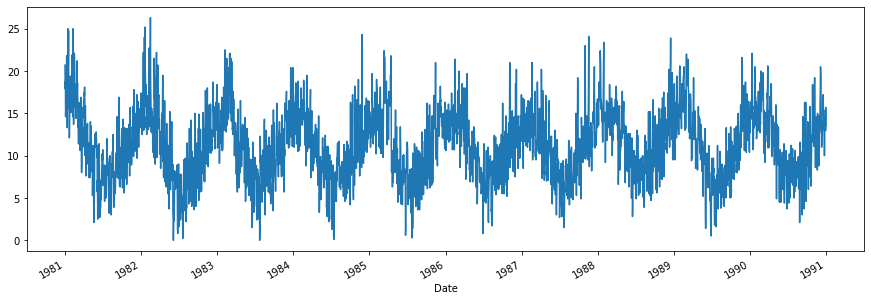

In [7]:
df.Temp.plot(figsize=(15, 5))

In [8]:
df = df.resample("M").mean()
df.head()

,Temp
Date,
1981-01-31,17.712903
1981-02-28,17.678571
1981-03-31,13.500000
1981-04-30,12.356667
1981-05-31,9.490323


<AxesSubplot:xlabel='Date'>

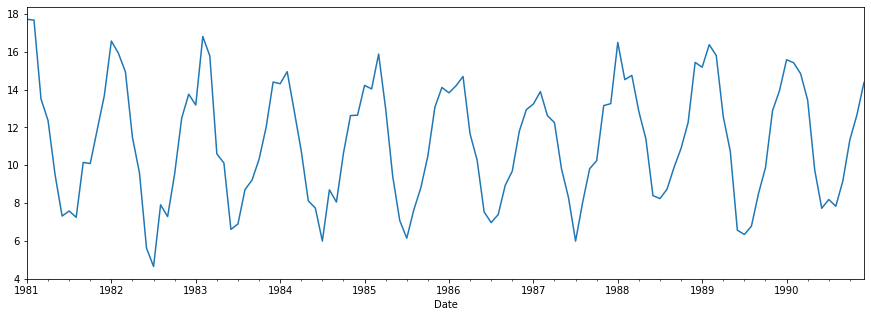

In [9]:
df.Temp.plot(figsize=(15, 5))

# Naive Forecasting

### oneshift

In [10]:
pred = df.copy()
pred = pred.shift(1)

In [11]:
pred.head()

,Temp
Date,
1981-01-31,NaN
1981-02-28,17.712903
1981-03-31,17.678571
1981-04-30,13.500000
1981-05-31,12.356667


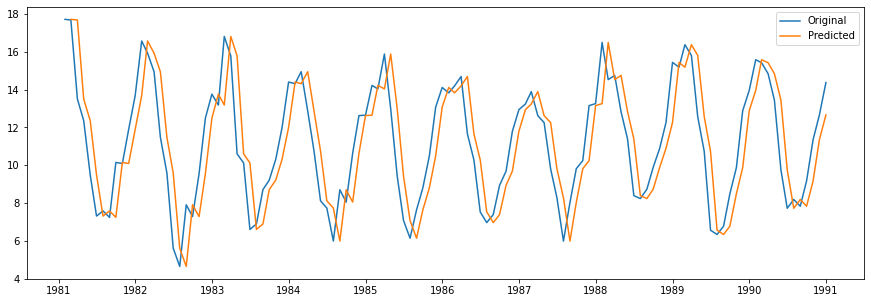

In [12]:
plt.figure(figsize=(15, 5))
plt.plot(df.index, df.Temp, label="Original")
plt.plot(pred.index, pred.Temp, label="Predicted")
plt.legend(loc="best")

### Mean as Forecast

In [13]:
Pred = df.copy()
Pred.Temp = [df.loc[:date].Temp.mean() for date in df.index]
pred = pred.shift(1)

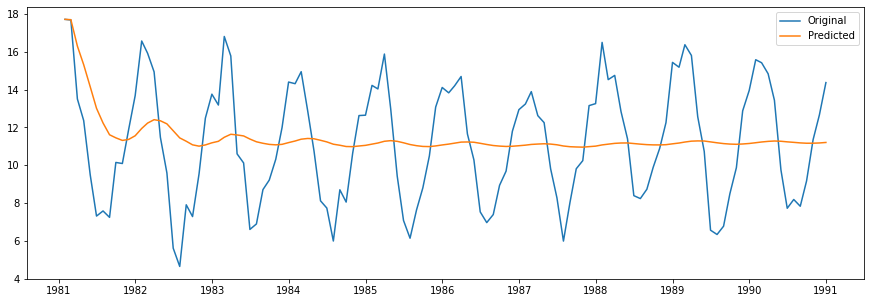

In [14]:
plt.figure(figsize=(15, 5))
plt.plot(df.index, df.Temp, label="Original")
plt.plot(Pred.index, Pred.Temp, label="Predicted")
plt.legend(loc="best")

### Moving Average / Rolling Mean Forecasting

In [15]:
pred1 = df.copy()
pred1.Temp = df.rolling(3).mean().shift(1)
pred1.head()

,Temp
Date,
1981-01-31,NaN
1981-02-28,NaN
1981-03-31,NaN
1981-04-30,16.297158
1981-05-31,14.511746


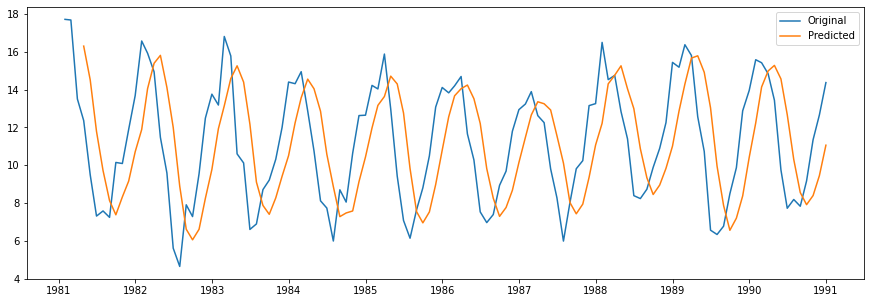

In [16]:
plt.figure(figsize=(15, 5))
plt.plot(df.index, df.Temp, label="Original")
plt.plot(pred1.index, pred1.Temp, label="Predicted")
plt.legend(loc="best")